# Evaluating Student Performance

Examination is an assessment to measure a test-taker skill, knowledge, aptitude, physical fitness or standing in some other topics. In other words, it can also be seen as a set of question to find out studenet's knowledge on various topics and field [(Wikipedia)](). It has been part of us since the invention of formal education. Performance from the perspective of examination is the report on the success or otherwise based on an agreed grade system.

The popular cliche is that performace in examination is tied to studiousness but experiecne has shown that a number of factors should be considered in the evaluation of studen'ts performance in formal examination




## Data

**Source:**

The data set, Student Performance in Exams,a csv format was source from Kaggle web site. Which can be found [here](https://www.kaggle.com/spscientist/students-performance-in-exams/version/1#StudentsPerformance.csv).
The Data set, essentially is a collection of students scores in Math, Writing and Reading examinations.


**Data set Columns/Fields**

*  **Gender**:This contain the sex of the students; whether the individual is a male or female
*  **Race/ethnicity** : This is whether the individual is black, white or brown e.t.c
*  **Parental Level of Education**: This capture the level of formal eduation of the parent
*  **Lunch**: Contain whether there is provision for lunch for students
* **Test preparation course**: This contain whether the student completed the preparatory course
*  **Math score**: The aggregate score of the student in math examination
*  **Reading score**: The aggregate score in reading examination
*  **Writing score**: The aggregate score in writing examination

## Objective

To understand the influence of factors such as the educational level of student's parent, test preparation, lunch e.t.c on student performance.
To this end we would explore this data set for answers to the following:
* Does having university educated or sophisticated parents affect student performance?
* Does studying the preparation course affect student performance?
* Does race/ethnicity affect  student performance?

In [35]:
#Import the usual suspects
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams.update({'font.size': 22})

In [36]:
#Loading the data to the frame
perform = pd.read_csv("data/StudentsPerformance.csv")

## Meta Data Analysis

In [37]:
perform.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [48]:
perform.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [49]:
#rows and colums
perform.shape

(1000, 8)

In [50]:
#let's see the structure of the data set
perform.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [51]:
# the summary statistics of the numerical columns
perform.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [52]:
#summary statistics for the object and categorical columns
perform.describe(include=[np.object, pd.Categorical]).T

,count,unique,top,freq
gender,1000,2,female,518
race/ethnicity,1000,5,group C,319
parental level of education,1000,6,some college,226
lunch,1000,2,standard,645
test preparation course,1000,2,none,642


In [53]:
perform.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


From the meta data, we observed that the data set is made of 1000 rows or observations and 8 data columns. Also the columns are in the form of words with spaces in between, this is not pythonic, hence we would need to rename the columns to be in line with the python [snake case]('https://en.wikipedia.org/wiki/Snake_case').

Under the summary of the numeric data points we can see that the average score in math is 66.068 with a standard deviation of 15.163080, whereas the average score of reading exams is 69.169 with a corresponding standard deviation of 14.600192.Also, similarly the average score in the writing exams is 68.054 with a standard deviation of  15.195657.

Similarly under the summary of the categorical/object, we can see that males and females took the exams, however  more female take the test with a frequency of 518. We also see that there are five ethnic groups and ethnic group c are prominent in the exams. We also see that there are five categories of parent educational levels,studebt with parent with some colleges feature prominently in the exams. We can also see that more of the student take standard lunch and lastly we can see that more student dont study the  exam preparation course fofr the exams.

In [54]:
#see the configure of the columns
perform.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [55]:
prettify_col = {'gender':'gender', 'race/ethnicity':'race', \
                'parental level of education': 'par_edu_level', 
                'lunch': 'lunch',
                'test preparation course':'test_prep',
                'math score': 'math_score',
                'reading score':'read_score',
                'writing score': 'write_score'
               }

In [56]:
#get a codable colums
perform.rename(columns=prettify_col, inplace=True)

In [57]:
perform.head()

,gender,race,par_edu_level,lunch,test_prep,math_score,read_score,write_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [58]:
#checking for missing values
perform.isnull().sum()

gender           0
race             0
par_edu_level    0
lunch            0
test_prep        0
math_score       0
read_score       0
write_score      0
dtype: int64

### Student whose parent have master's degree as against their counterpart with some college that had more than 98 score in math examination.
While no student whose parent hold master's degree had  more than 98 score in math, 6 students whose parent have some college education had more than 98 score in math. And as a matter of fact 3 out of these 6 students had a perfect score.


In [59]:
perform[(perform.par_edu_level == "master's degree") & (perform.math_score >= 98)]

,gender,race,par_edu_level,lunch,test_prep,math_score,read_score,write_score


In [60]:
perform[(perform.par_edu_level == "some college") & (perform.math_score >= 98)]

,gender,race,par_edu_level,lunch,test_prep,math_score,read_score,write_score
104,male,group C,some college,standard,completed,98,86,90
306,male,group E,some college,standard,completed,99,87,81
451,female,group E,some college,standard,none,100,92,97
623,male,group A,some college,standard,completed,100,96,86
625,male,group D,some college,standard,completed,100,97,99
712,female,group D,some college,standard,none,98,100,99


### Number of students taking the examination

We can see that students with parents that do not have bsc degree and post-graduate degree form the majority that take these exams. Does this enthusiasm in education translate to performance on the part of these student? However this need to be further investigated. Could it be that parent without university degree tend to encourage their children to take these exams? Or they just want their offspring to have the opportunity they missed?


We can equally deduced that student of Group C race forms the greater number of individuals that tale the test.which is followed by group D race whereas the group A race happen to have the least number of indivuals taling test

We can also see more female take the examination compared to their male counterpart


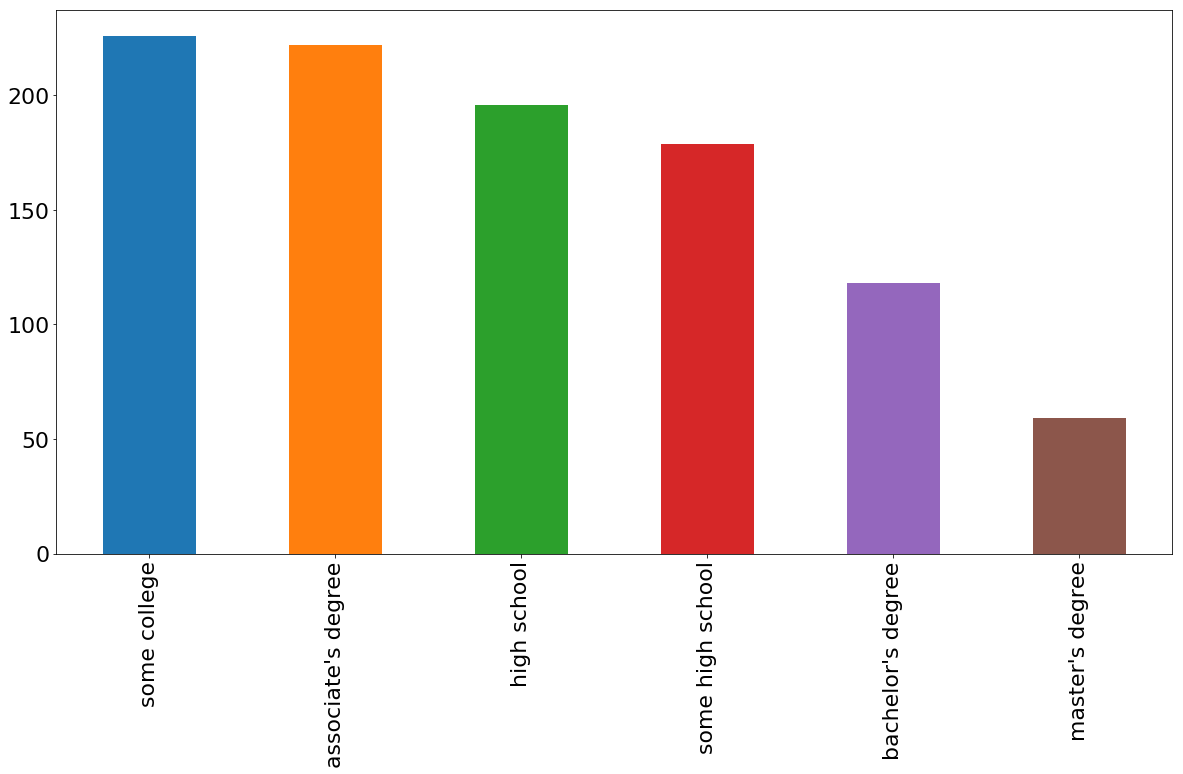

In [61]:
#counting the number of student taking the exams vice a vice their parent educational level
perform['par_edu_level'].value_counts().plot(kind='bar');

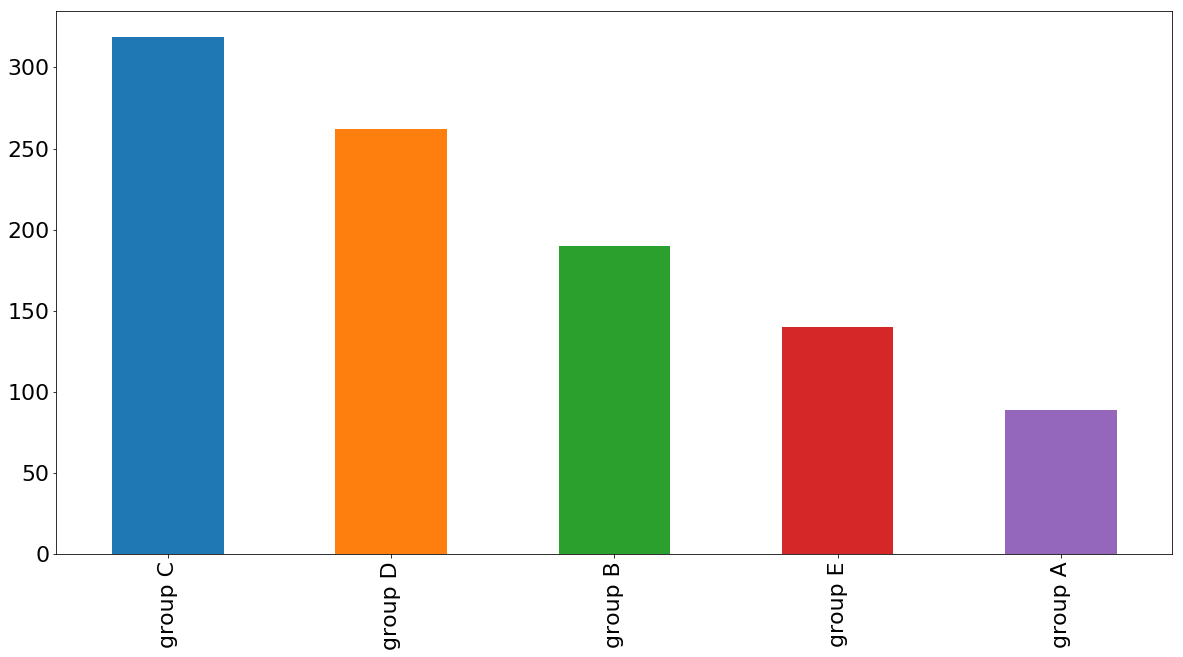

In [62]:
#counting the various race taking the exams
perform['race'].value_counts().plot(kind='bar');

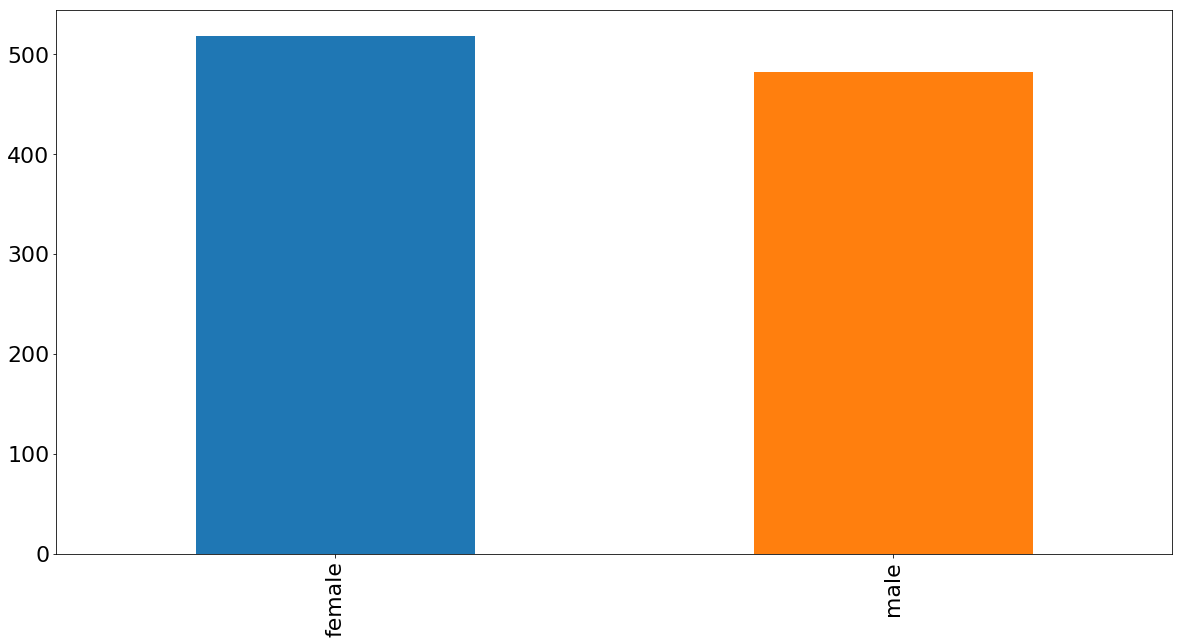

In [63]:
#counting the gender or sex of student taking the exams
perform['gender'].value_counts().plot(kind='bar');


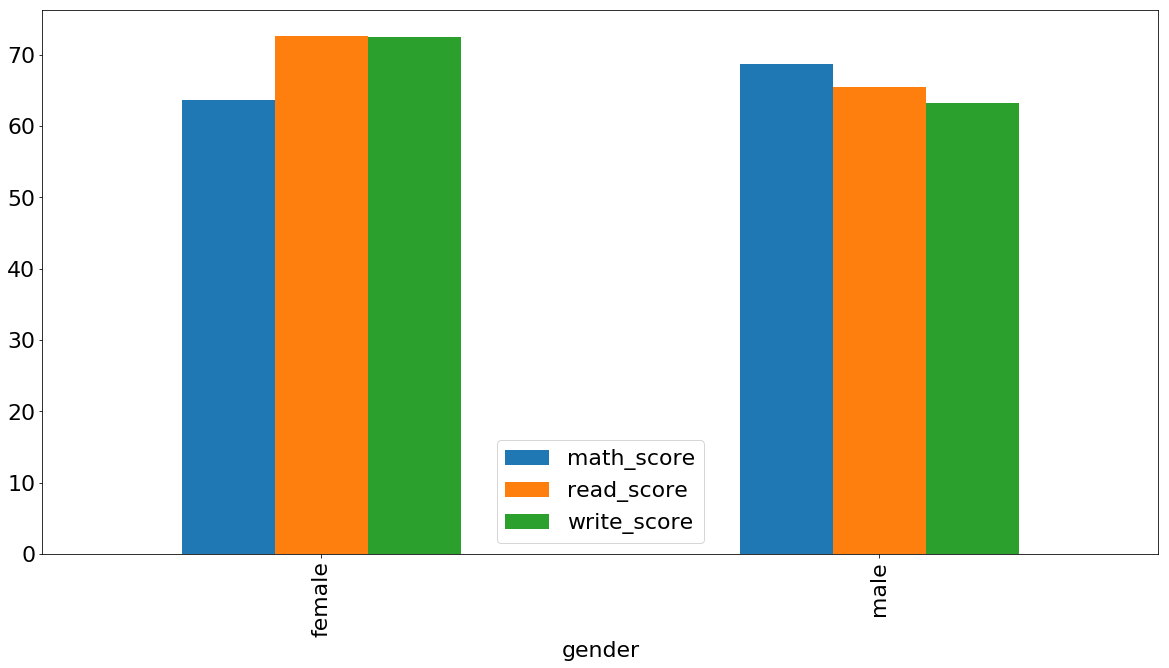

In [64]:
# the average performance of males and females in the exams
perform[['gender', 'math_score', 'read_score', 'write_score']].groupby('gender').mean().plot(kind='bar')

The average performance of female students especially in writing and reading exams are remarkably higher,however the male students emerge stronger especially in  math exams

###  Does the Educational level of  parent affect student performance?

From the below bar graph students whose parent are university graduates and post graduates are on the average having an ' **A**' grade on all exams. Similarly if we were to consider the minimum scores of  students in all  the exams, we can see that student whose parents are post-graduate comes top followed closely by student whose parent have a bsc degree.
what could be responsible for this solid performance? could  the gene of high intellect transfered from the university educated parents to their offspring be responsible?



In [65]:
average_performance = perform[['par_edu_level', 'math_score', 'read_score', 'write_score']].groupby('par_edu_level').mean()
average_performance

,math_score,read_score,write_score
par_edu_level,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


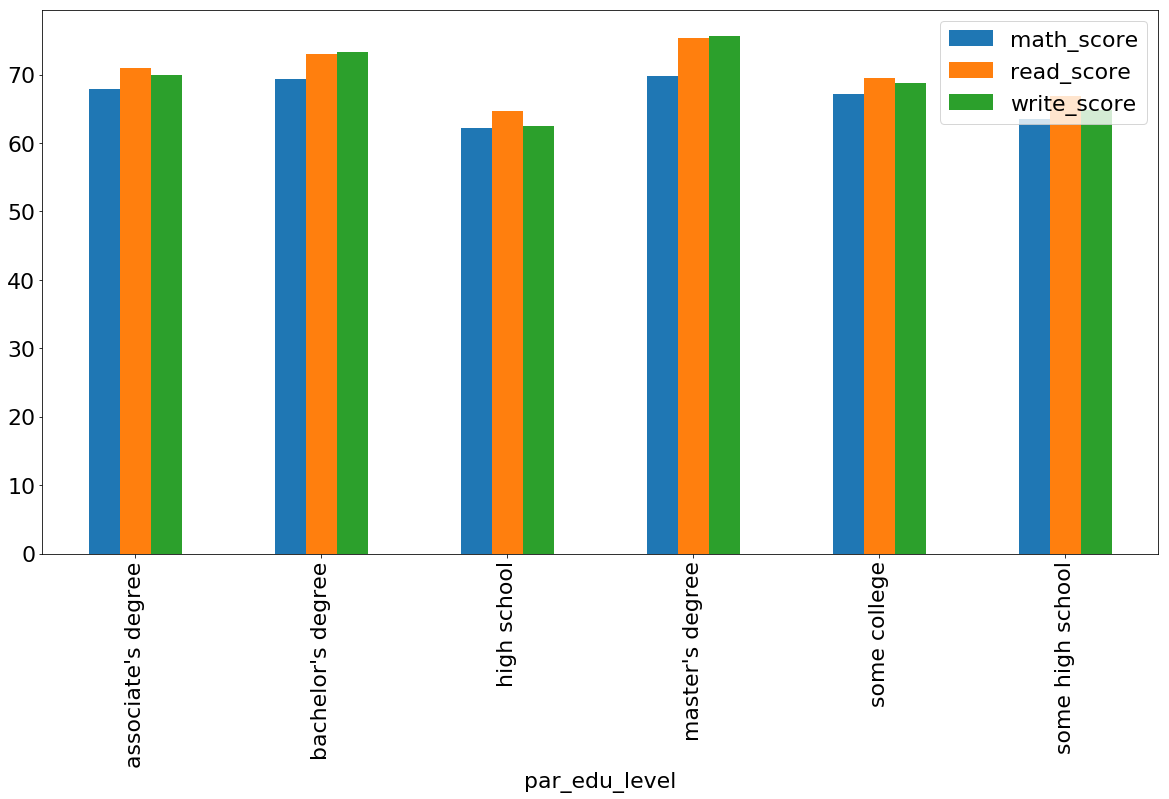

In [66]:
#The above difference a fuether depicted by the below bar chart. We can see also student with sophisticated parents leading the park
average_performance.plot(kind='bar');

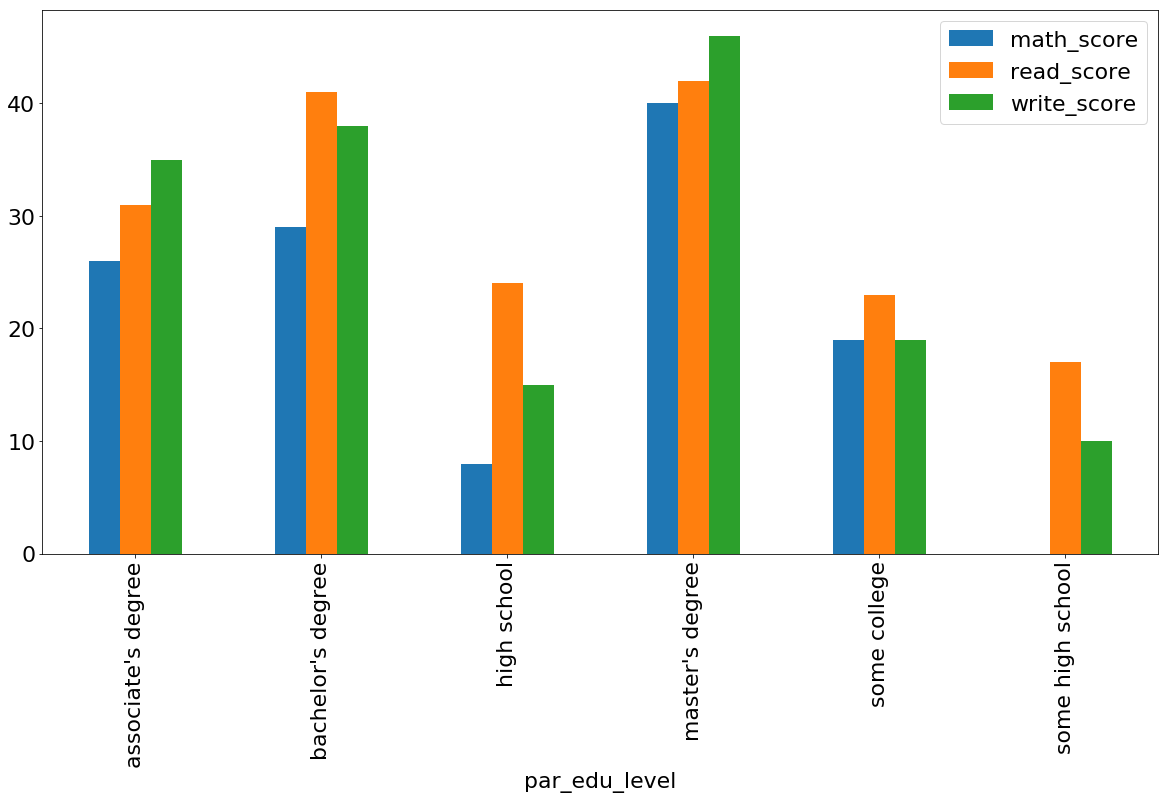

In [67]:
# when we look at the minimum score across student base on their parent eduational level. The difference is shocking
minimum_performance = perform[['par_edu_level', 'math_score', 'read_score', 'write_score']].groupby('par_edu_level').min().plot(kind='bar')


In [68]:
check_melt = perform.melt(id_vars= ['gender', 'race', 'par_edu_level','lunch','test_prep'],\
                         value_vars=['math_score', 'read_score', 'write_score'], var_name='Subjects', value_name='Scores')


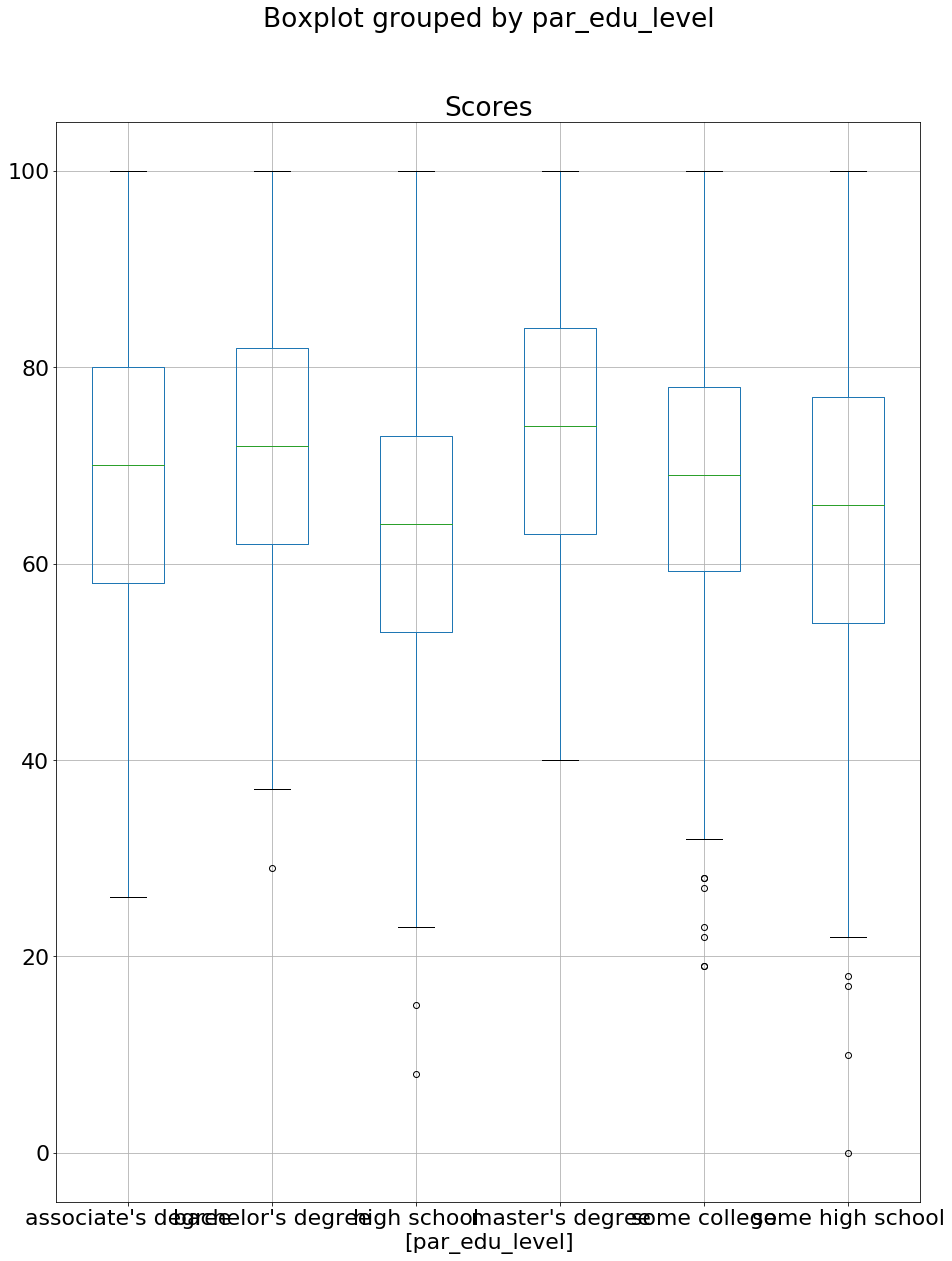

In [69]:
check_melt[['par_edu_level', 'Scores']].boxplot(by='par_edu_level', figsize= (15,20))

###  Does the Completion of the preparation course affect student performance?

#### Genius is 1% talent and 99% hardwork?


We can se from the above graphs that the average performance of student that completed the test preparation course  is higher as against those students didn't  take the preparation course. So does it mean that those that did not prepare for the test, did so because they are adverse to success. Was the test preparation course affordable and available? Could it also be that student could not study the preparation course for lack of incentive ?



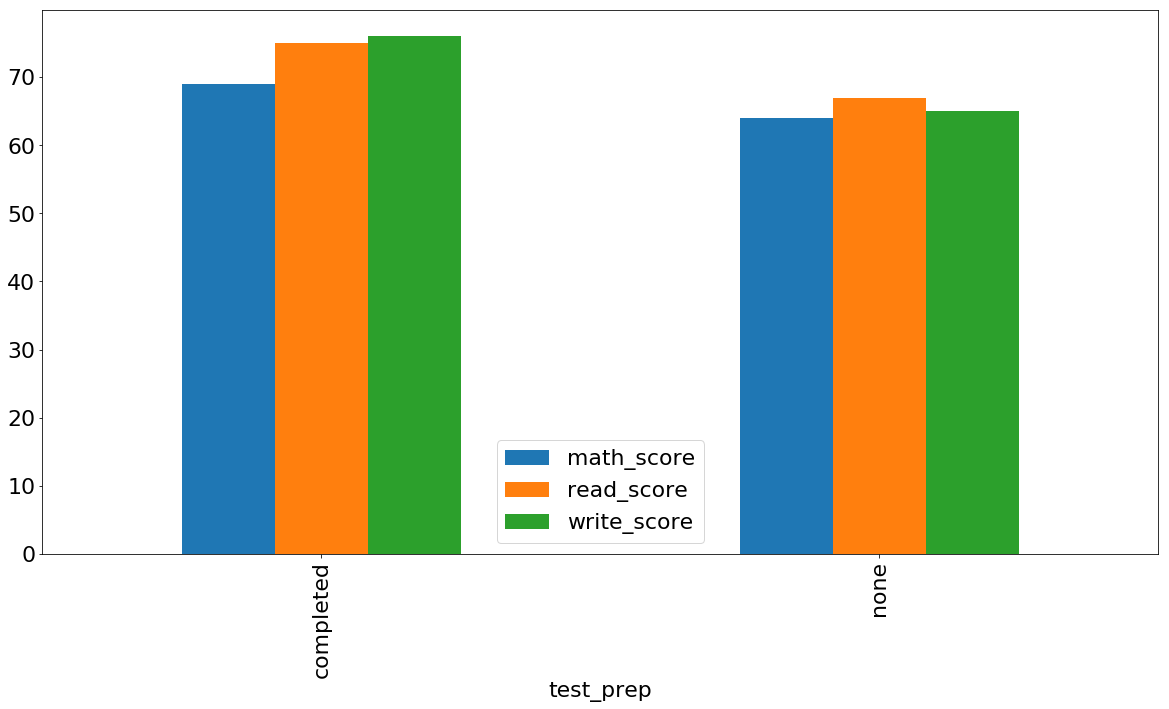

In [70]:
perform[['test_prep', 'math_score', 'read_score', 'write_score']].groupby('test_prep').median().plot(kind='bar')

In [71]:
check_melt = perform.melt(id_vars= ['gender', 'race', 'par_edu_level','lunch','test_prep'],\
                         value_vars=['math_score', 'read_score', 'write_score'], var_name='Subjects', value_name='Scores')


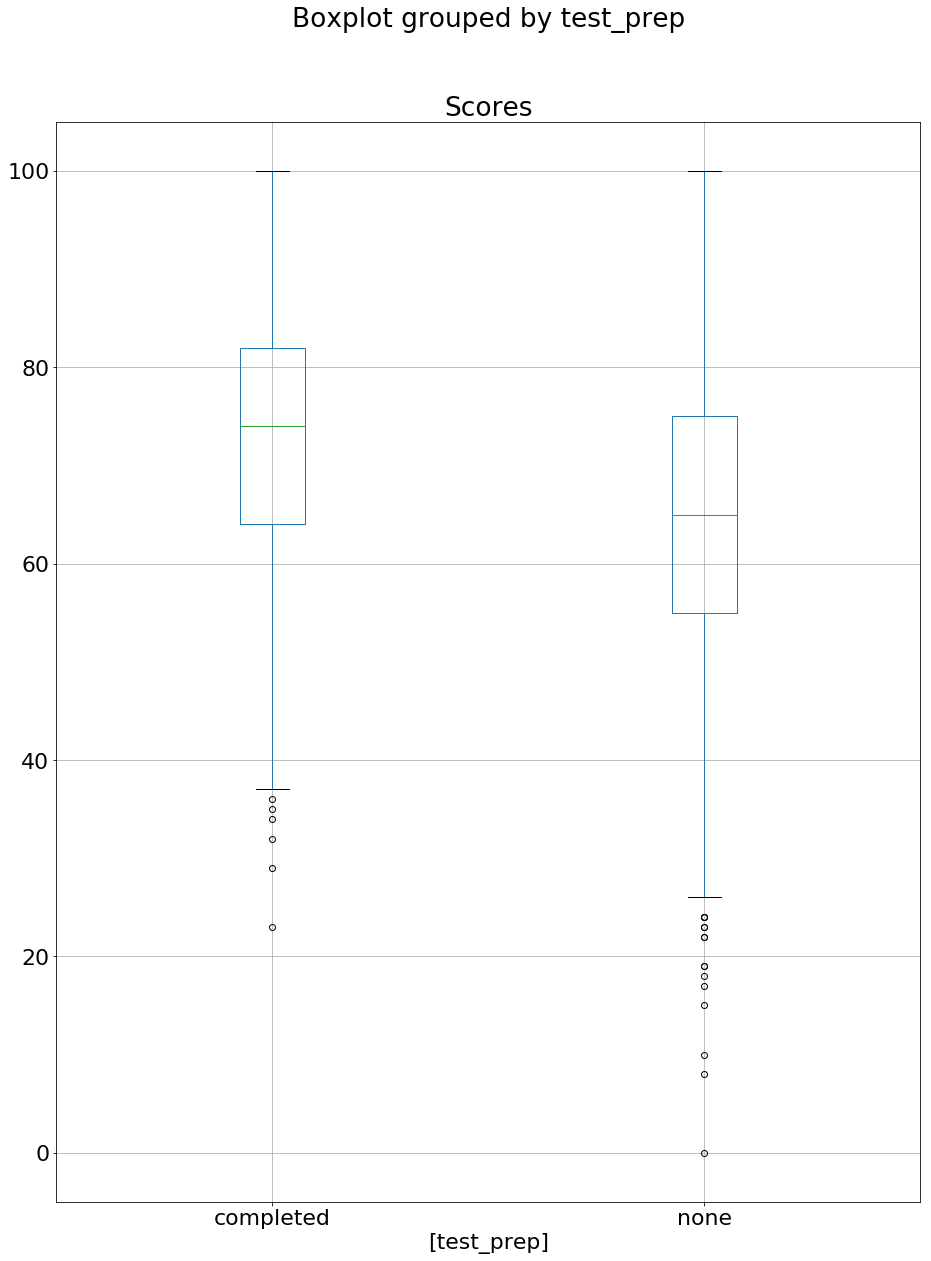

In [72]:
check_melt[['test_prep', 'Scores']].boxplot(by='test_prep', figsize= (15,20))

## A hungry man  an angry man?

It's quite interesting to note that  lunch appear to be a critical factor in the perfomance of student. Not just its availability but the form it takes. Thus those student that were served standard lunch tend to perform better.

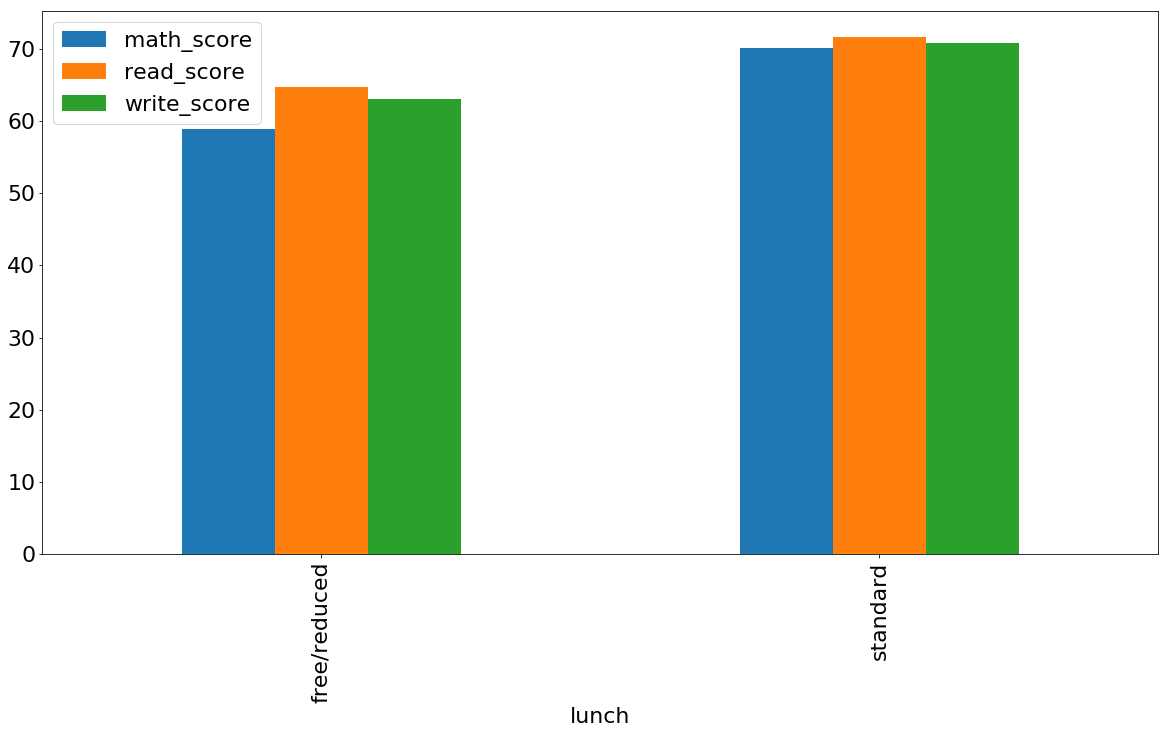

In [73]:
perform[['lunch', 'math_score', 'read_score', 'write_score']].groupby('lunch').mean().plot(kind='bar');

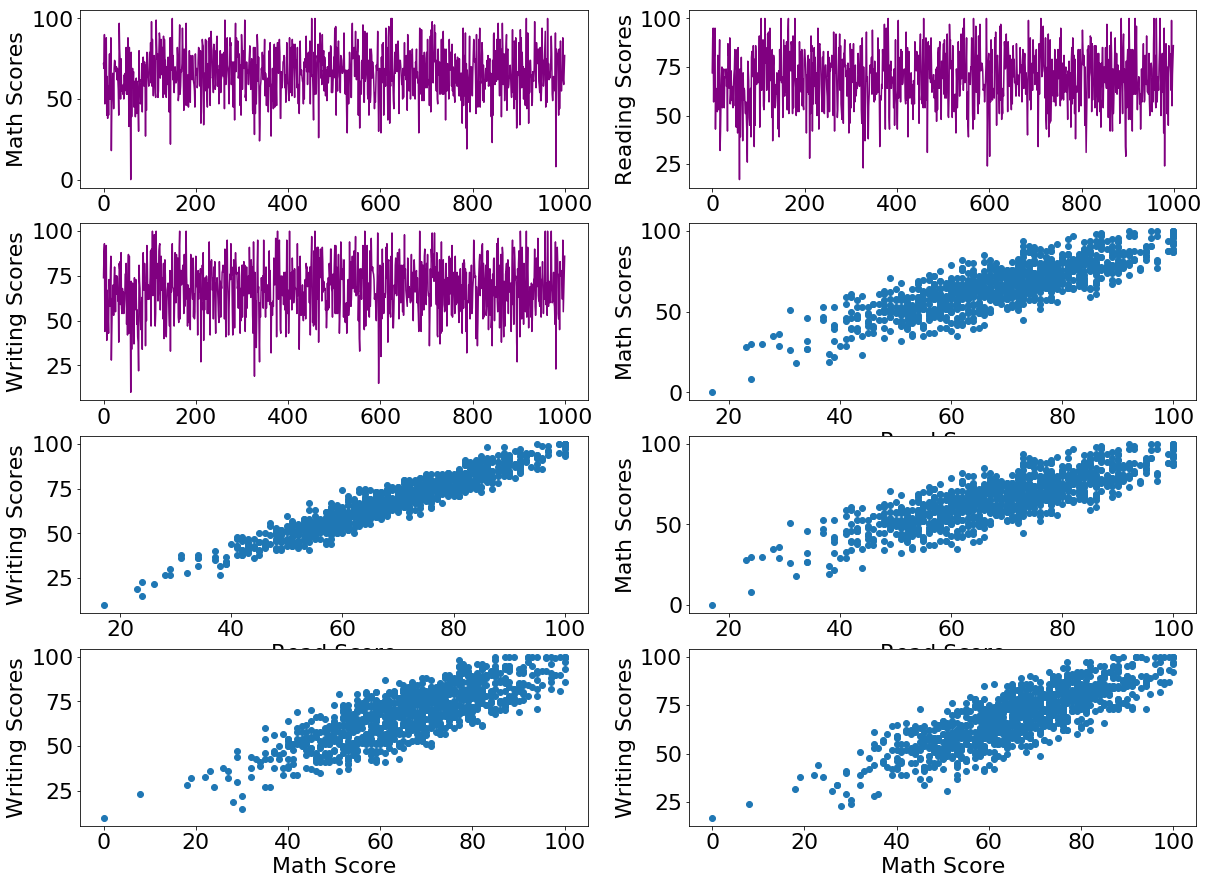

In [74]:
plt.figure(figsize=(20,15)) 

plt.subplot(4, 2, 1)
plt.plot(perform['math_score'], color='purple')
plt.ylabel('Math Scores')


plt.subplot(4, 2, 2)
plt.plot(perform['read_score'], color='purple')
plt.ylabel('Reading Scores')

plt.subplot(4, 2, 3)
plt.plot(perform['write_score'], color='purple')
plt.ylabel('Writing Scores')

plt.subplot(4, 2, 4)
plt.scatter(perform['read_score'], perform['math_score'])
plt.ylabel('Math Scores')
plt.xlabel('Read Score')

plt.subplot(4, 2, 5)
plt.scatter(perform['read_score'], perform['write_score'])
plt.ylabel('Writing Scores')
plt.xlabel('Read Score')

plt.subplot(4, 2, 6)
plt.scatter(perform['read_score'],perform['math_score'])
plt.ylabel('Math Scores')
plt.xlabel('Read Score')

plt.subplot(4, 2, 7)
plt.scatter(perform['math_score'],perform['write_score'])
plt.ylabel('Writing Scores')
plt.xlabel('Math Score')


plt.subplot(4, 2, 8)
plt.scatter(perform['math_score'],perform['read_score'])
plt.ylabel('Writing Scores')
plt.xlabel('Math Score')

plt.show()







## Are the  math scores of male and female similar?
$\LARGE H\large A$ : The math score of male and female student are similar

$\LARGE H\large\theta$ : The math score of male and female student are not similar


As we can see,the math score of male and female student are similar. The weak  and  **negative T-Value of**  -3.09304 connotes there is no significant difference between the two group and the small **p-value**  0.002086123 tells us that this is unlikely to have occured by chance.

In [85]:
from scipy import stats

In [79]:
math_male = perform[(perform.gender== 'male') & (perform.math_score)]

In [81]:
math_male['math_score'].head()

3     47
25    73
26    69
34    97
35    81
Name: math_score, dtype: int64

In [82]:
math_female = perform[(perform.gender== 'female') & (perform.math_score)]

In [93]:
math_female['math_score'].head()

1     69
5     71
12    65
15    69
21    65
Name: math_score, dtype: int64

In [92]:
stats.ttest_ind(math_female['math_score'], math_male['math_score'] )

Ttest_indResult(statistic=-3.093048534444657, pvalue=0.0020861232808782916)

## What would be a valuable direction for further investigation?

There are further questions that would be interesting to research further. These include:
* Do the race or ethnic of students affect their performance
* What is the average performance of female students whose parent are master degree holders as against their counterpart with some college degree. This would shared light into whether female education and academic performance is a function of the sophistication or eduacational qualification  of the parent
* Are the performance of specific subjects or courses dependent on the gender of the student
* Are some race/ethnic better performer in certain subects?
